In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [23]:
mode = "test"

In [26]:
orig_images_dir = "Original Images/"+mode
images_dir = "cropnblur/"+mode
masks_dir = "Groundtruths/"+mode+"/Hard Exudates"
offsets_dir = "offsets/"+mode
out_dir = "Groundtruths/crops/"+mode+"/Hard Exudates"

if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

In [27]:
for image_name in tqdm(os.listdir(images_dir)):
    image_name = image_name[:-4]
    with open(os.path.join(offsets_dir, image_name+".txt"), 'r') as f:
        offsets = list(map(int, f.readline().split()))
    
    image = cv2.imread(os.path.join(images_dir, image_name+".jpg"))
    mask = cv2.imread(os.path.join(masks_dir, image_name+".tif"))
    new_mask = mask[offsets[2]:offsets[2]+offsets[4], offsets[3]:offsets[3]+offsets[5]]

    cv2.imwrite(os.path.join(out_dir, image_name+".tif"), new_mask)

100%|██████████| 27/27 [00:09<00:00,  2.86it/s]


In [5]:
offsets

[2848, 4288, 0, 288, 2848, 3418]

In [6]:
image = cv2.imread(os.path.join(images_dir, image_name+".jpg"))

In [7]:
image.shape

(2848, 3418, 3)

In [8]:
mask = cv2.imread(os.path.join(masks_dir, image_name+".tif"))

In [9]:
mask.shape

(2848, 4288, 3)

In [10]:
new_mask = mask[offsets[2]:offsets[2]+offsets[4], offsets[3]:offsets[3]+offsets[5]]

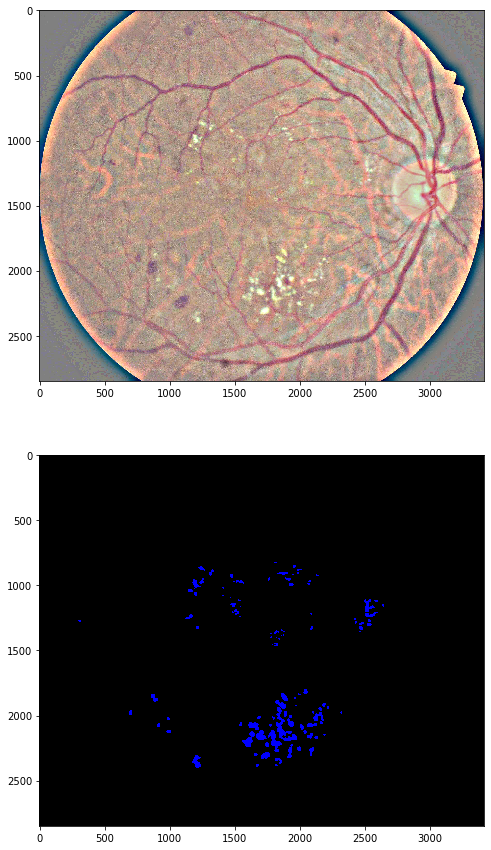

In [11]:
f, ax = plt.subplots(2, figsize=(11,15))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[1].imshow(new_mask)
plt.show()

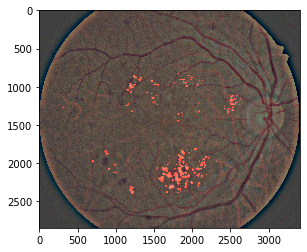

In [12]:
combined = cv2.addWeighted(image, 0.5, new_mask, 1, 0.0)
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))

In [13]:
orig_image = cv2.imread(os.path.join(orig_images_dir, image_name+".jpg"))

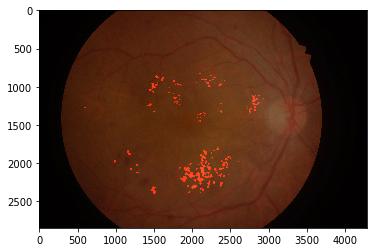

In [14]:
combined = cv2.addWeighted(orig_image, 0.5, mask, 1, 0.0)
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))